In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

In [3]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

#  Import and read the charity_data.csv.
charity_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
charity_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


## Preprocessing

In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
drop_columns = ['EIN', 'NAME']
charity_df = charity_df.drop(columns = drop_columns)

# Rows, columns
print(charity_df.shape, '\n\n')

list(charity_df.columns)


(34299, 10) 




['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'STATUS',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS',
 'ASK_AMT',
 'IS_SUCCESSFUL']

In [5]:
# 0 count << 1 count; eliminating records with 'STATUS' = 0
status_count = charity_df['STATUS'].value_counts()
print(status_count)

charity_df = charity_df[charity_df['STATUS'] == 1]


1    34294
0        5
Name: STATUS, dtype: int64


In [6]:
# 'Y' count << 'N' count; eliminating records with 'SPECIAL_CONSIDERATIONS' = 'Y'

considerations_count = charity_df['SPECIAL_CONSIDERATIONS'].value_counts()
print(considerations_count)

charity_df = charity_df[charity_df['SPECIAL_CONSIDERATIONS'] == 'N']

N    34268
Y       26
Name: SPECIAL_CONSIDERATIONS, dtype: int64


In [7]:
# Now dropping the columns: 'STATUS', 'SPECIAL_CONSIDERATIONS', since each column has only ONE category

drop_columns = ['STATUS', 'SPECIAL_CONSIDERATIONS']
charity_df = charity_df.drop(columns = drop_columns)

# Rows, columns
print(charity_df.shape, '\n\n')

list(charity_df.columns)

(34268, 8) 




['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'ASK_AMT',
 'IS_SUCCESSFUL']

In [8]:
# Checking 'INCOME_AMT' categories
income_count = charity_df['INCOME_AMT'].value_counts()
print(income_count)

0                24370
25000-99999       3745
100000-499999     3373
1M-5M              955
1-9999             721
10000-24999        540
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64


In [9]:
# Determine the number of unique values in each column.
charity_df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8741
IS_SUCCESSFUL          2
dtype: int64

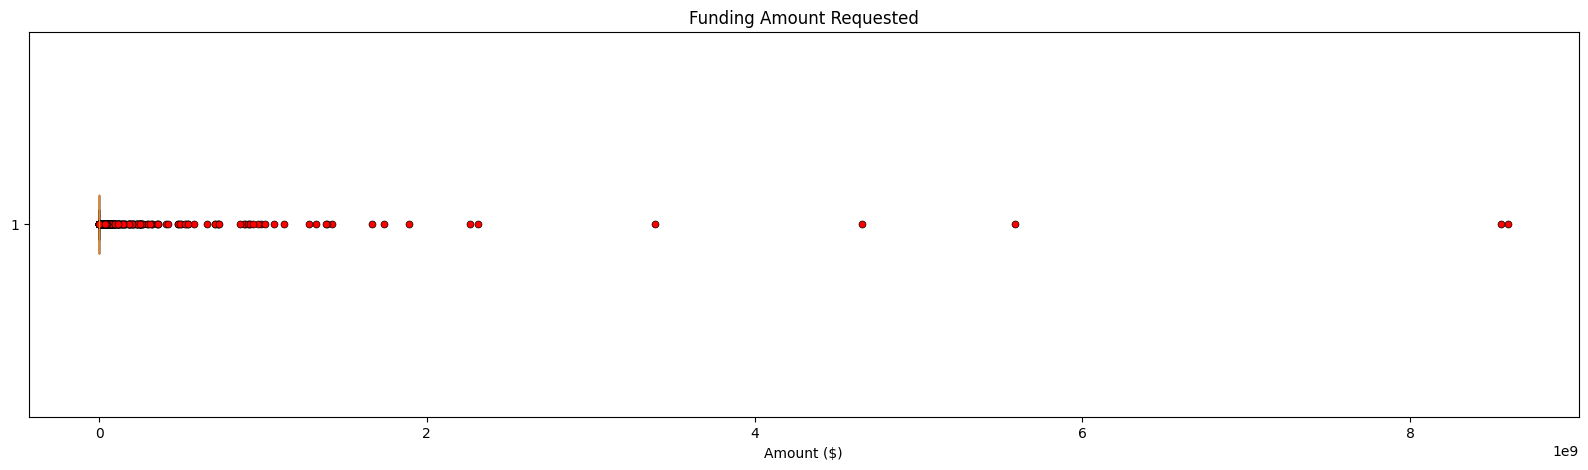

In [11]:
# Box plot to find outliers for 'ASK_AMT'
fig1, ax1 = plt.subplots()
ax1.set_title('Funding Amount Requested')
ax1.set_xlabel('Amount ($)')

plt.rcParams["figure.figsize"] = (20,5)
outlier_dot_style = dict(marker = 'o', markerfacecolor = 'red', markersize = 5, markeredgecolor='black', markeredgewidth=0.5)
ax1.boxplot(charity_df['ASK_AMT'], vert=False, flierprops = outlier_dot_style)

plt.show()


In [12]:
# The most extreme outliers
amt_billion = charity_df[charity_df['ASK_AMT'] >= 1000000000]
print(amt_billion.shape)

display(amt_billion)

(18, 8)


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
773,T3,Family/Parent,C2800,Preservation,Trust,50M+,1736232349,1
871,T3,Independent,C1000,Preservation,Trust,50M+,1326447551,0
12344,T3,Independent,C1700,Heathcare,Trust,50M+,1420537175,0
21558,T3,Independent,C1000,Preservation,Association,50M+,1068119241,0
21633,T3,Independent,C1000,Heathcare,Trust,50M+,2264109450,0
24795,T3,Independent,C2000,Preservation,Trust,50M+,4653011914,0
24796,T3,Independent,C2000,Preservation,Trust,50M+,1391441555,0
24947,T3,Independent,C1000,Heathcare,Trust,50M+,2310256039,1
25563,T3,Independent,C1000,Preservation,Trust,50M+,1382280715,0
30121,T3,Independent,C1000,Heathcare,Trust,50M+,1281905997,1


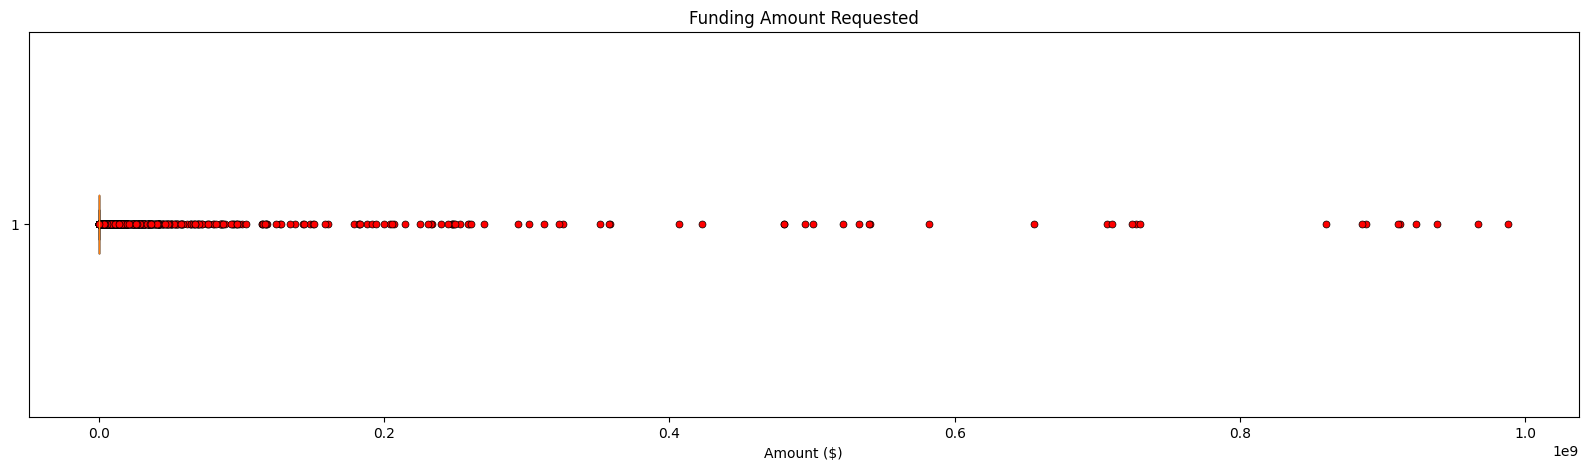

In [13]:
# Eliminating the most extreme outliers

charity_df = charity_df[charity_df['ASK_AMT'] < 1000000000]
fig1, ax1 = plt.subplots()
ax1.set_title('Funding Amount Requested')
ax1.set_xlabel('Amount ($)')

plt.rcParams["figure.figsize"] = (20,5)
outlier_dot_style = dict(marker = 'o', markerfacecolor = 'red', markersize = 5, markeredgecolor='black', markeredgewidth=0.5)
ax1.boxplot(charity_df['ASK_AMT'], vert=False, flierprops = outlier_dot_style)

plt.show()

In [14]:
# Look at APPLICATION_TYPE value counts for binning
charity_df['APPLICATION_TYPE'].value_counts()

T3     26988
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [15]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`

cutoff_value = 100

# Number of each 'APPLICATION_TYPE'
T_nn = charity_df['APPLICATION_TYPE'].value_counts()

# Create a list
application_types_to_replace = T_nn[T_nn < cutoff_value].index.tolist()
print(application_types_to_replace)

# relabel values in 'APPLICATION_TYPE'
charity_df['APPLICATION_TYPE'] = charity_df['APPLICATION_TYPE']\
                                      .apply(lambda x: 'Other' if x in application_types_to_replace else x)

# Check to make sure binning was successful
charity_df['APPLICATION_TYPE'].value_counts()


['T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']


T3       26988
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [16]:
# Look at CLASSIFICATION value counts > 5

C_nnnn = charity_df['CLASSIFICATION'].value_counts()
C_nnnn[C_nnnn > 5]

C1000    17298
C2000     6063
C1200     4832
C3000     1918
C2100     1882
C7000      776
C1700      285
C4000      194
C5000      116
C1270      114
C2700      104
C2800       94
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
Name: CLASSIFICATION, dtype: int64

In [17]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`

cutoff_value = 100
print(C_nnnn.iloc[11:].index, '\n\n')

# Create a list
classifications_to_replace = C_nnnn[C_nnnn < cutoff_value].index.tolist()

# relabel values in 'CLASSIFICATION'
charity_df['CLASSIFICATION'] = charity_df['CLASSIFICATION']\
                                      .apply(lambda x: 'Other' if x in classifications_to_replace else x)

# Check to make sure binning was successful
charity_df['CLASSIFICATION'].value_counts()

Index(['C2800', 'C7100', 'C1300', 'C1280', 'C1230', 'C1400', 'C7200', 'C2300',
       'C1240', 'C8000', 'C7120', 'C1500', 'C1800', 'C6000', 'C1250', 'C8200',
       'C1238', 'C1278', 'C1235', 'C1237', 'C7210', 'C2400', 'C1720', 'C4100',
       'C1257', 'C1600', 'C1260', 'C2710', 'C0', 'C3200', 'C1234', 'C1246',
       'C1267', 'C1256', 'C2190', 'C4200', 'C2600', 'C5200', 'C1370', 'C1248',
       'C6100', 'C1820', 'C1900', 'C1236', 'C3700', 'C2570', 'C1580', 'C1245',
       'C2500', 'C1570', 'C1283', 'C2380', 'C1732', 'C1728', 'C2170', 'C4120',
       'C8210', 'C2561', 'C4500', 'C2150'],
      dtype='object') 




C1000    17298
C2000     6063
C1200     4832
C3000     1918
C2100     1882
C7000      776
Other      668
C1700      285
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [18]:
# Categorical data
charity_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34250 entries, 0 to 34298
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   APPLICATION_TYPE  34250 non-null  object
 1   AFFILIATION       34250 non-null  object
 2   CLASSIFICATION    34250 non-null  object
 3   USE_CASE          34250 non-null  object
 4   ORGANIZATION      34250 non-null  object
 5   INCOME_AMT        34250 non-null  object
 6   ASK_AMT           34250 non-null  int64 
 7   IS_SUCCESSFUL     34250 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 2.4+ MB


In [19]:
# Make a copy before 'pd.get_dummies'
charity_df_no_dummies = charity_df.copy()
charity_df_no_dummies.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1


In [20]:
# Convert categorical data to numeric with `pd.get_dummies`
# Change charity_df to include columns with numeric values

charity_df = pd.get_dummies(charity_df)

print(charity_df.shape)
charity_df.head()

(34250, 48)


,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_T9,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C1270,CLASSIFICATION_C1700,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C2700,CLASSIFICATION_C3000,CLASSIFICATION_C4000,CLASSIFICATION_C5000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0
1,108590,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,5000,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0
3,6692,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,142590,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


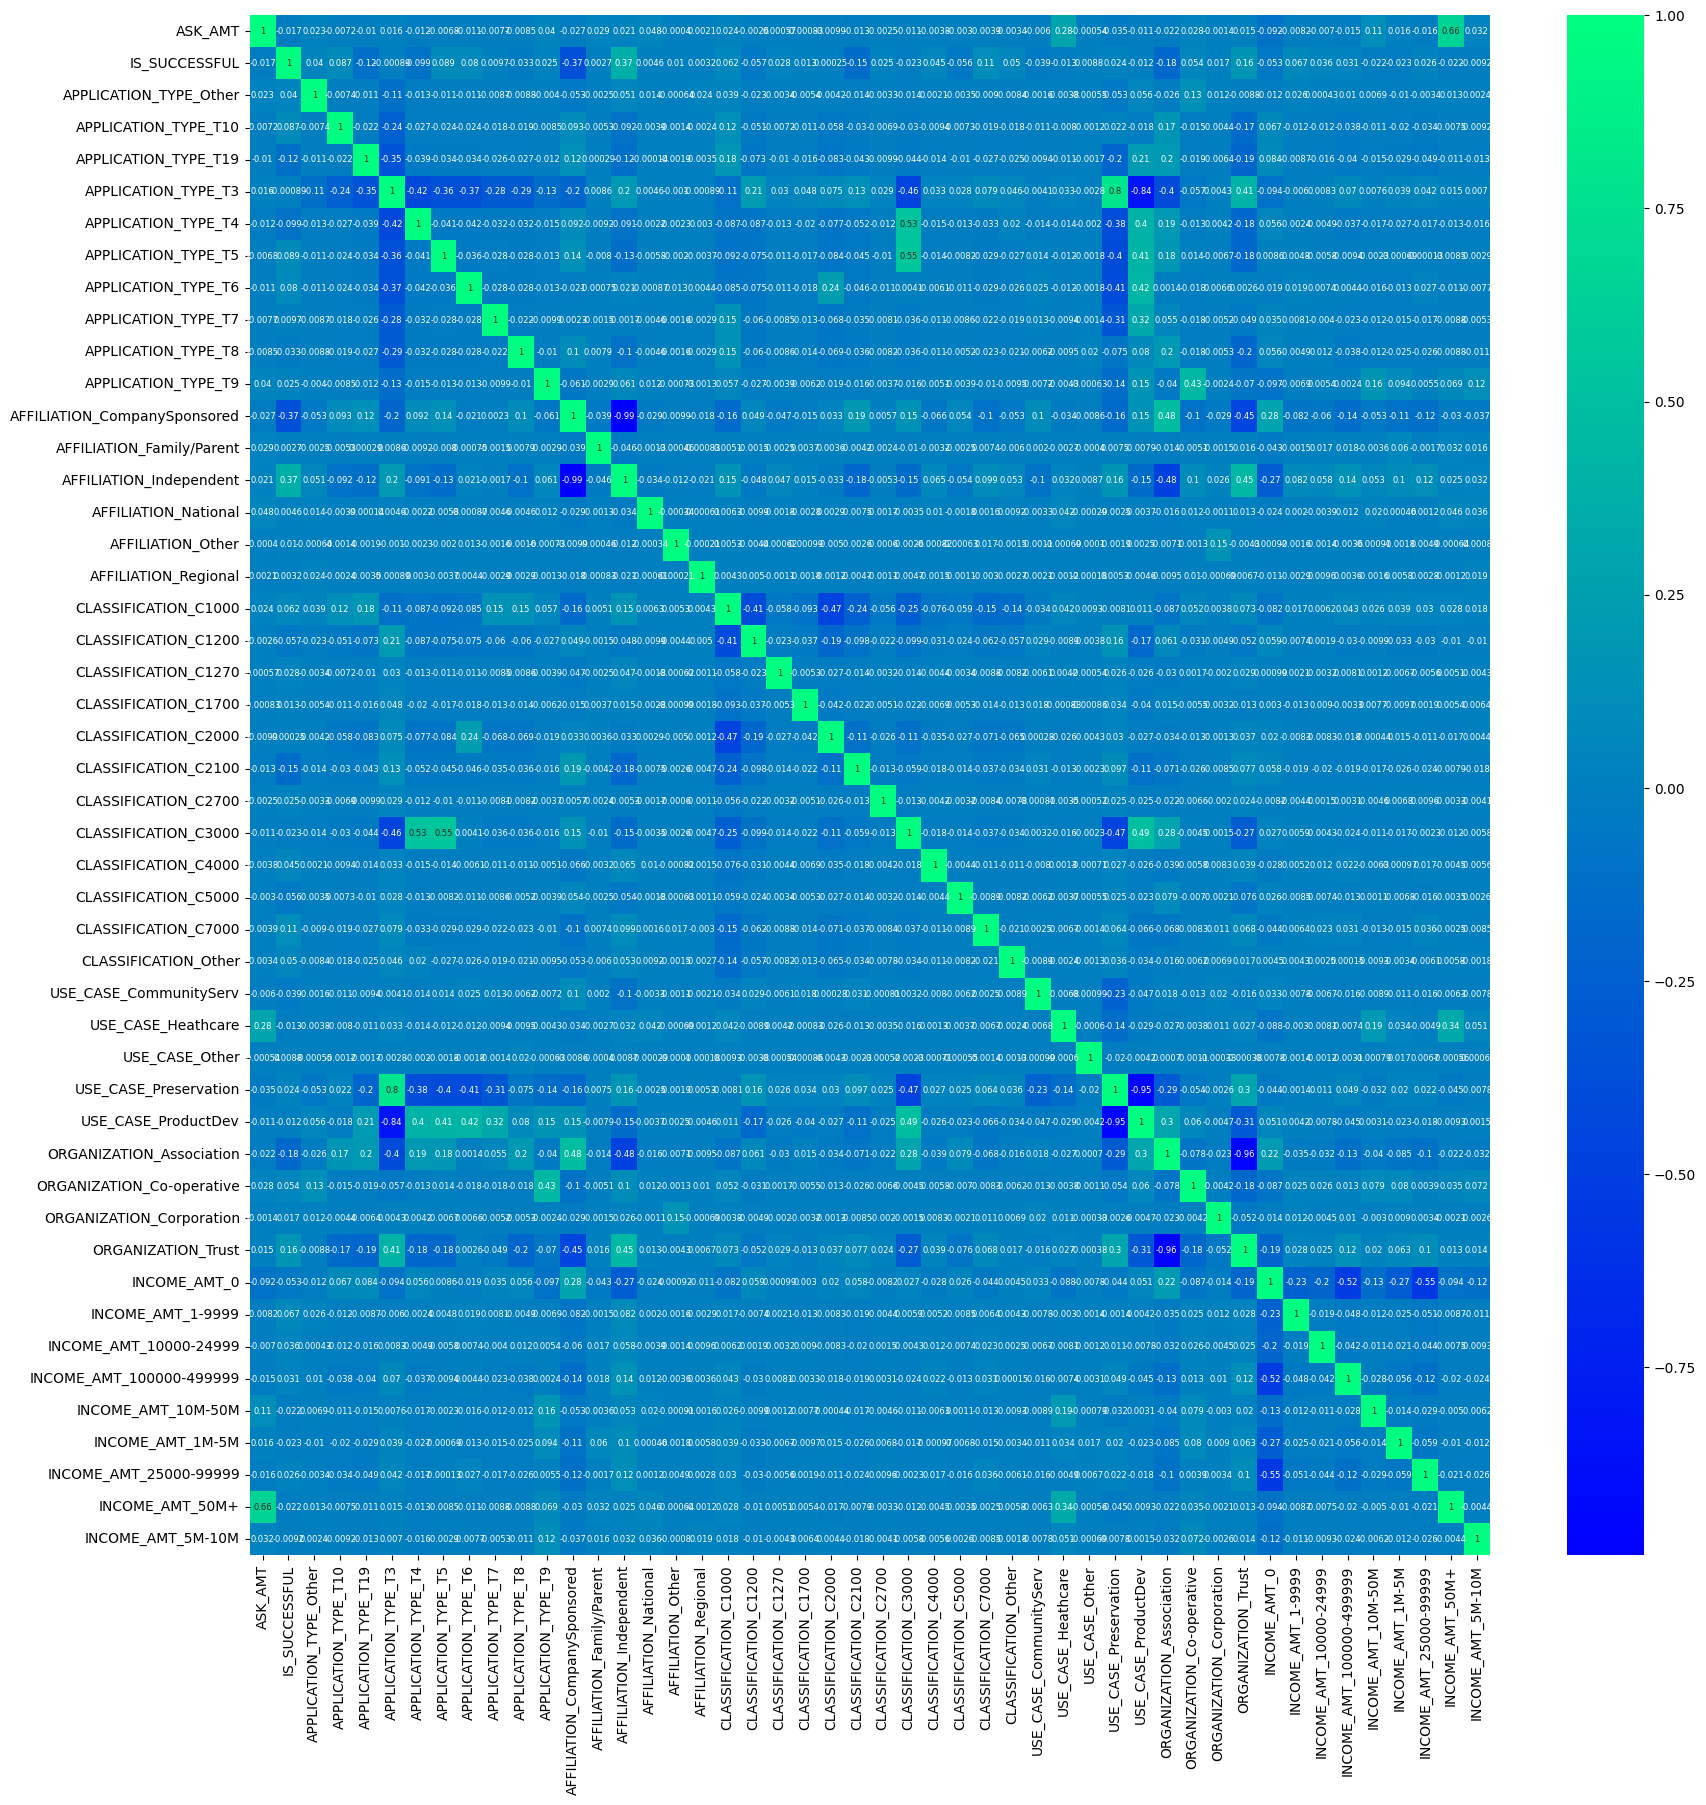

In [21]:
# Find correlation
cor_matrix = charity_df.corr()

# Create heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(cor_matrix, annot=True, cmap="winter", annot_kws={"fontsize": 6})
plt.show()

In [22]:
# High correlation coefficient (0.8) between 'APPLICATION_TYPE_T3' and 'USE_CASE_Preservation'
# Dropping column 'USE_CASE_Preservation'

drop_columns = ['USE_CASE_Preservation']
charity_df = charity_df.drop(columns = drop_columns)

# Rows, columns
print(charity_df.shape, '\n\n')



(34250, 47) 




In [23]:
# Split our preprocessed data into our features and target arrays

y = charity_df.IS_SUCCESSFUL.values
X = charity_df.drop(columns = "IS_SUCCESSFUL").values
X_columns = charity_df.drop(columns = "IS_SUCCESSFUL").columns.tolist()
print(f'y : {y}')
print(f'X (Column Names) : {X_columns}')


y : [1 1 0 ... 0 1 0]
X (Column Names) : ['ASK_AMT', 'APPLICATION_TYPE_Other', 'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6', 'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8', 'APPLICATION_TYPE_T9', 'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent', 'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other', 'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200', 'CLASSIFICATION_C1270', 'CLASSIFICATION_C1700', 'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C2700', 'CLASSIFICATION_C3000', 'CLASSIFICATION_C4000', 'CLASSIFICATION_C5000', 'CLASSIFICATION_C7000', 'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare', 'USE_CASE_Other', 'USE_CASE_ProductDev', 'ORGANIZATION_Association', 'ORGANIZATION_Co-operative', 'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0', 'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999', 'INCOME_

In [24]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, stratify=y)


# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [25]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 32.4 MB/s eta 0:00:00


In [26]:
# Create a method that creates a new Sequential model with hyperparameter options

def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation', ['relu','tanh'])

    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value = 1,
        max_value = 30,
        step = 5), activation = activation, input_dim = 46))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value = 1,
            max_value = 30,
            step = 5),
            activation=activation))

    nn_model.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer = 'adam', metrics = ["accuracy"])

    return nn_model

In [27]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective = "val_accuracy",
    max_epochs = 20,
    hyperband_iterations = 2)

Using TensorFlow backend


In [28]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 00m 45s]
val_accuracy: 0.7308186292648315

Best val_accuracy So Far: 0.7308186292648315
Total elapsed time: 00h 23m 55s


In [29]:
# Get top 3 model hyperparameters and print the values
top_hyper = tuner.get_best_hyperparameters(3)
for param in top_hyper:
    print(param.values)

{'activation': 'tanh', 'first_units': 11, 'num_layers': 2, 'units_0': 16, 'units_1': 11, 'units_2': 6, 'units_3': 1, 'units_4': 11, 'tuner/epochs': 20, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}
{'activation': 'relu', 'first_units': 6, 'num_layers': 4, 'units_0': 11, 'units_1': 26, 'units_2': 6, 'units_3': 21, 'units_4': 11, 'tuner/epochs': 7, 'tuner/initial_epoch': 3, 'tuner/bracket': 2, 'tuner/round': 1, 'tuner/trial_id': '0030'}
{'activation': 'tanh', 'first_units': 16, 'num_layers': 5, 'units_0': 21, 'units_1': 11, 'units_2': 26, 'units_3': 16, 'units_4': 16, 'tuner/epochs': 20, 'tuner/initial_epoch': 7, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0050'}


In [30]:
# Evaluate the top 3 models against the test dataset
top_model = tuner.get_best_models(3)
for model in top_model:
    model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 2s - loss: 0.5514 - accuracy: 0.7308 - 2s/epoch - 7ms/step
Loss: 0.551412045955658, Accuracy: 0.7308186292648315
268/268 - 2s - loss: 0.5556 - accuracy: 0.7302 - 2s/epoch - 7ms/step
Loss: 0.555603563785553, Accuracy: 0.7302347421646118
268/268 - 1s - loss: 0.5530 - accuracy: 0.7301 - 1s/epoch - 5ms/step
Loss: 0.5529603958129883, Accuracy: 0.7301179766654968


In [31]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'tanh',
 'first_units': 11,
 'num_layers': 2,
 'units_0': 16,
 'units_1': 11,
 'units_2': 6,
 'units_3': 1,
 'units_4': 11,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [32]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5514 - accuracy: 0.7308 - 533ms/epoch - 2ms/step
Loss: 0.551412045955658, Accuracy: 0.7308186292648315


In [33]:
# Export our model to HDF5 file

filepath = "AlphabetSoupCharity_Optimization.h5"
best_model.save(filepath)